# Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

from _config import PATH_RAW_DTU_SOLAR_STATION, PKL_PROCESSED_STEP1_DTU_SOLAR_STATION

# Load DTU Solar Station data
The following code loads all csv files into one pandas dataframe, then it adds the timestamp as the index in pandas, then we ensure that the entire range of observations in a one minute interval is present and if not, then add it to the dataframe as nan values.

Then we show some information about the data.

In [2]:
# Get all CSV files in the path folder
csv_files = list(PATH_RAW_DTU_SOLAR_STATION.glob("*.csv"))

# Read each CSV file and combine them into a single DataFrame
dfs = [pd.read_csv(f) for f in csv_files]
df = pd.concat(dfs, ignore_index=True)
df.set_index('Time(utc)', inplace=True)
df.index = pd.to_datetime(df.index)

# Add missing indexes to the period (columns will be filled with NaN values.)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1min")
df = df.reindex(full_range)
df.sort_index(inplace=True)
df_raw = df.copy()

print(df.shape)
print(df.columns)
display(df.describe().round(3), df.info())
df.head()

(5260805, 12)
Index(['GHI', 'DNI', 'DHI', 'LWD', 'wind_speed_avg', 'wind_dir_avg',
       'air_temperature', 'air_pressure', 'relative_humidity',
       'rain_accumulation', 'rain_duration', 'rain_intensity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5260805 entries, 2015-01-01 00:00:00 to 2025-01-01 08:04:00
Freq: min
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   GHI                float64
 1   DNI                float64
 2   DHI                float64
 3   LWD                float64
 4   wind_speed_avg     float64
 5   wind_dir_avg       float64
 6   air_temperature    float64
 7   air_pressure       float64
 8   relative_humidity  float64
 9   rain_accumulation  float64
 10  rain_duration      float64
 11  rain_intensity     float64
dtypes: float64(12)
memory usage: 521.8 MB


,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity
count,5031319.000,4965446.000,4993921.000,3073445.000,5086375.000,5086375.000,5086013.000,5086203.000,5086203.000,4963979.000,4963979.000,4963979.000
mean,118.681,122.276,57.042,753.191,2.732,204.257,9.897,1007.485,73.333,0.001,1.953,0.065
std,207.283,261.393,92.284,9781.588,1.774,89.644,6.587,10.670,13.849,0.014,9.794,0.857
min,-9.758,-12.520,-23.610,-7.325,-0.980,-0.139,-10.100,958.200,12.200,-0.919,-0.946,-0.909
25%,-1.149,-0.303,-1.079,293.227,1.400,123.000,4.700,1001.000,64.900,0.000,0.000,0.000
50%,3.305,-0.006,3.613,324.874,2.400,231.000,9.500,1008.000,76.800,0.000,0.000,0.000
75%,149.400,8.135,83.760,349.682,3.700,274.000,15.000,1014.000,84.400,0.000,0.000,0.000
max,1690.000,1001.190,882.000,311300.000,26.700,359.000,31.600,1044.000,94.400,2.080,110.000,123.400


None

,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity
2015-01-01 00:00:00,0.000325,NaN,-0.000002,NaN,5.0,278.0,4.8,1020.0,81.5,0.0,0.0,0.0
2015-01-01 00:01:00,NaN,NaN,NaN,NaN,4.7,264.0,4.8,1020.0,81.6,0.0,0.0,0.0
2015-01-01 00:02:00,NaN,NaN,NaN,NaN,3.3,269.0,4.8,1020.0,81.6,0.0,0.0,0.0
2015-01-01 00:03:00,NaN,NaN,NaN,NaN,3.6,247.0,4.8,1020.0,81.7,0.0,0.0,0.0
2015-01-01 00:04:00,NaN,NaN,NaN,NaN,2.2,228.0,4.8,1020.0,81.7,0.0,0.0,0.0


## PLOT: Visualize missing data

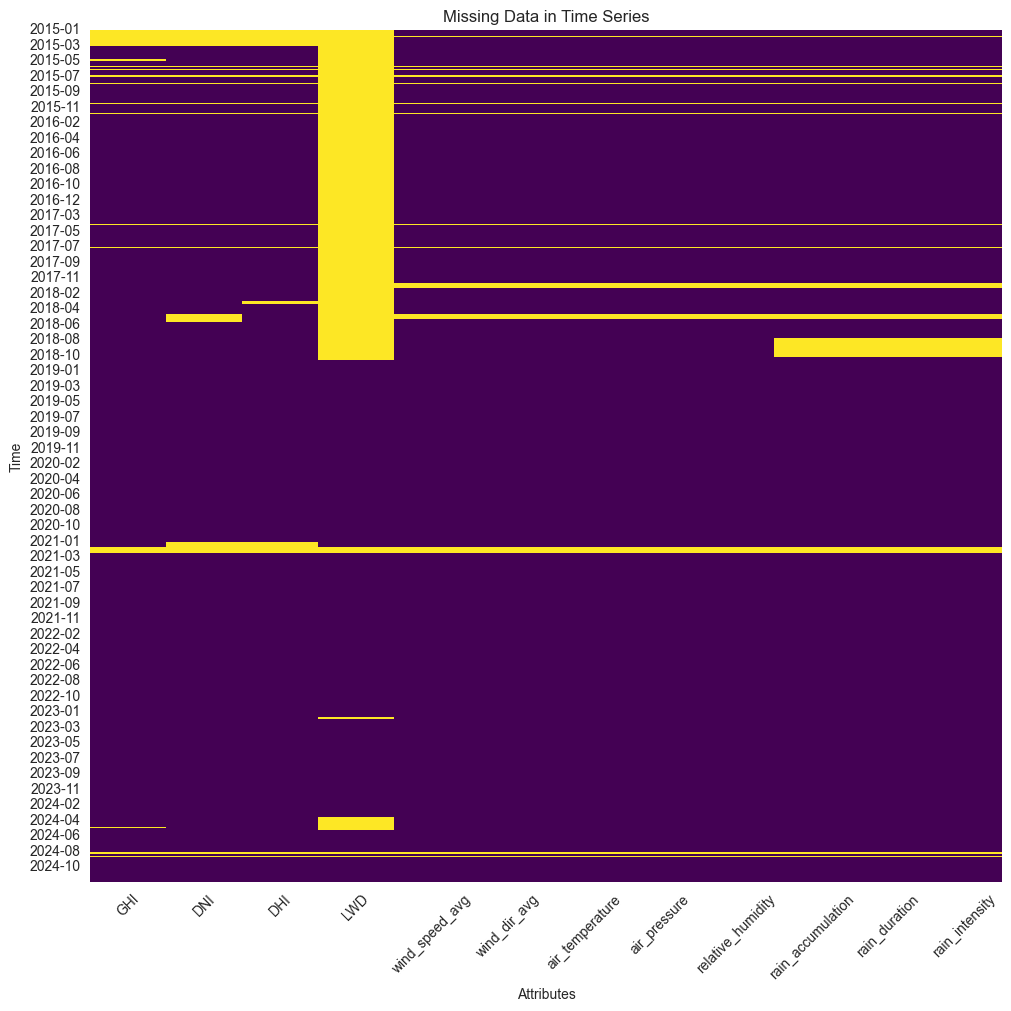

In [3]:
# Plot the heatmap
plt.figure(figsize=(10, 10), layout='constrained')
ax = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Time Series')
plt.xlabel('Attributes')
plt.ylabel('Time')
plt.xticks(rotation=45)
# Get current y-tick positions (these are row indices, not datetime values)
ytick_positions = ax.get_yticks()

# Format the tick labels to show only year and month.
# (Using int() to convert the float positions to integer indices; be sure they are in range.)
tick_labels = []
for pos in ytick_positions:
    idx = int(pos)
    if 0 <= idx < len(df.index):
        # Format datetime to 'YYYY-MM'
        tick_labels.append(df.index[idx].strftime('%Y-%m'))
    else:
        tick_labels.append('')

ax.set_yticklabels(tick_labels, rotation=0)
# plt.savefig('./thesis_content/missing_data.png', dpi=100)
plt.show()

## PLOT: Visualize data as time series
Visualize all data as time series for the entire period

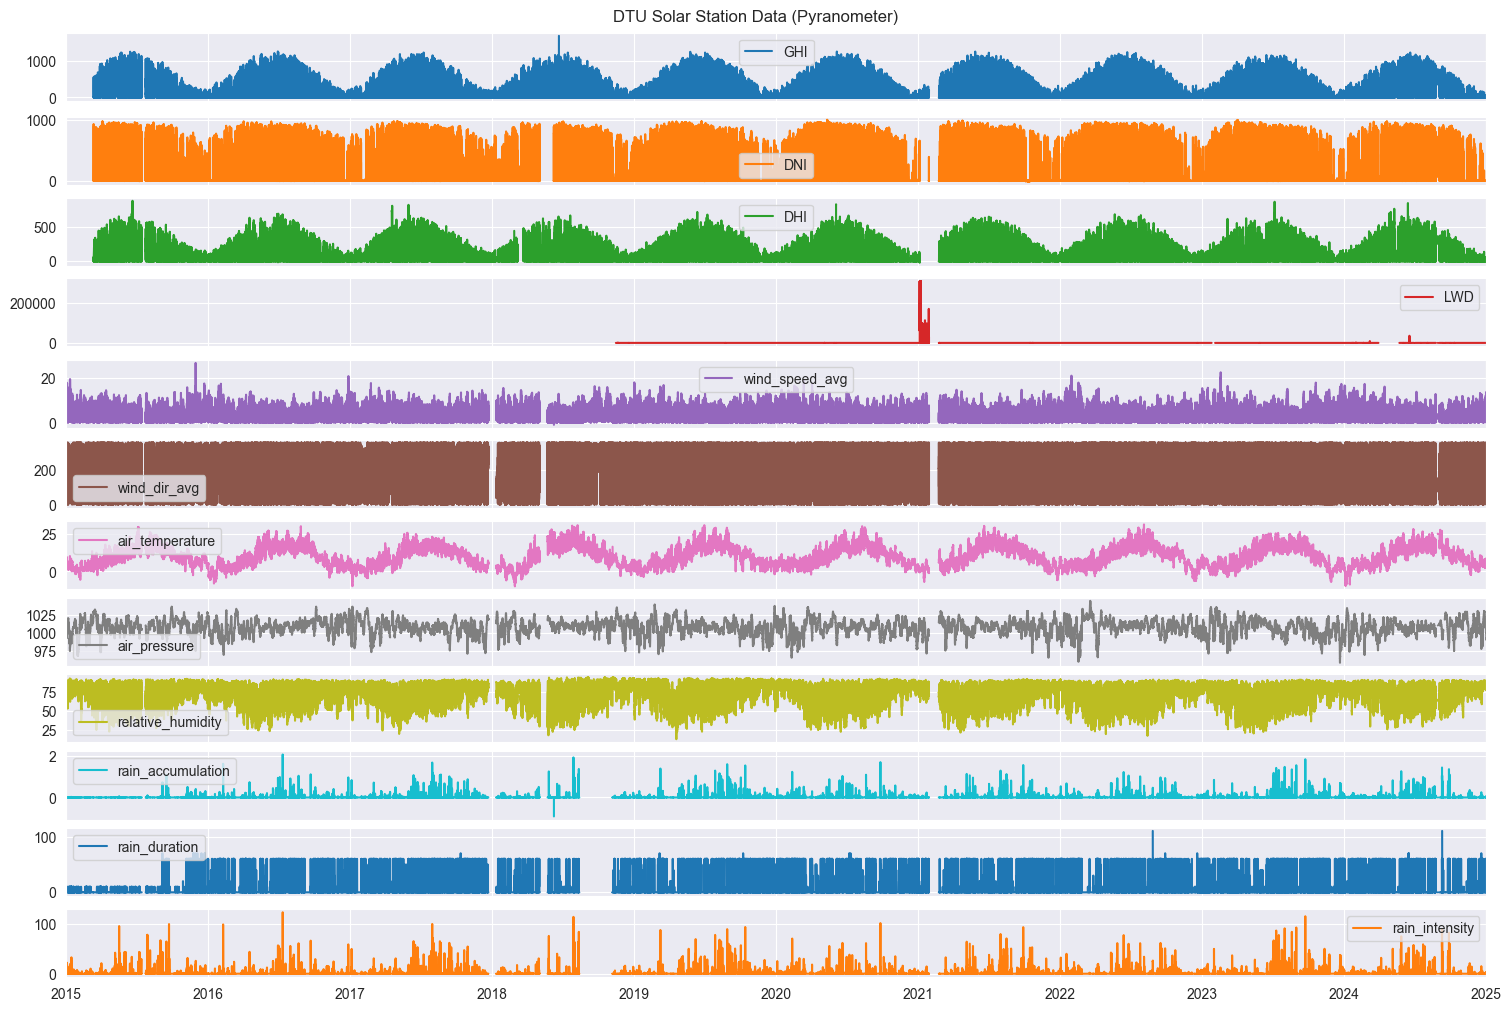

In [4]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 10), constrained_layout=True)
df.plot(title='DTU Solar Station Data (Pyranometer)', subplots=True, ax=axes)
# Hide x-axis tick labels on all but the last subplot
for ax in axes[:-1]:
    ax.label_outer()  # hides x-axis tick labels and x-label
# Remove scientific notation on y-axis
for ax in axes:
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')  # Forces plain style
# plt.savefig('./thesis_content/time_series_data.png', dpi=100)
plt.show()

## PLOT: Correlation matrix

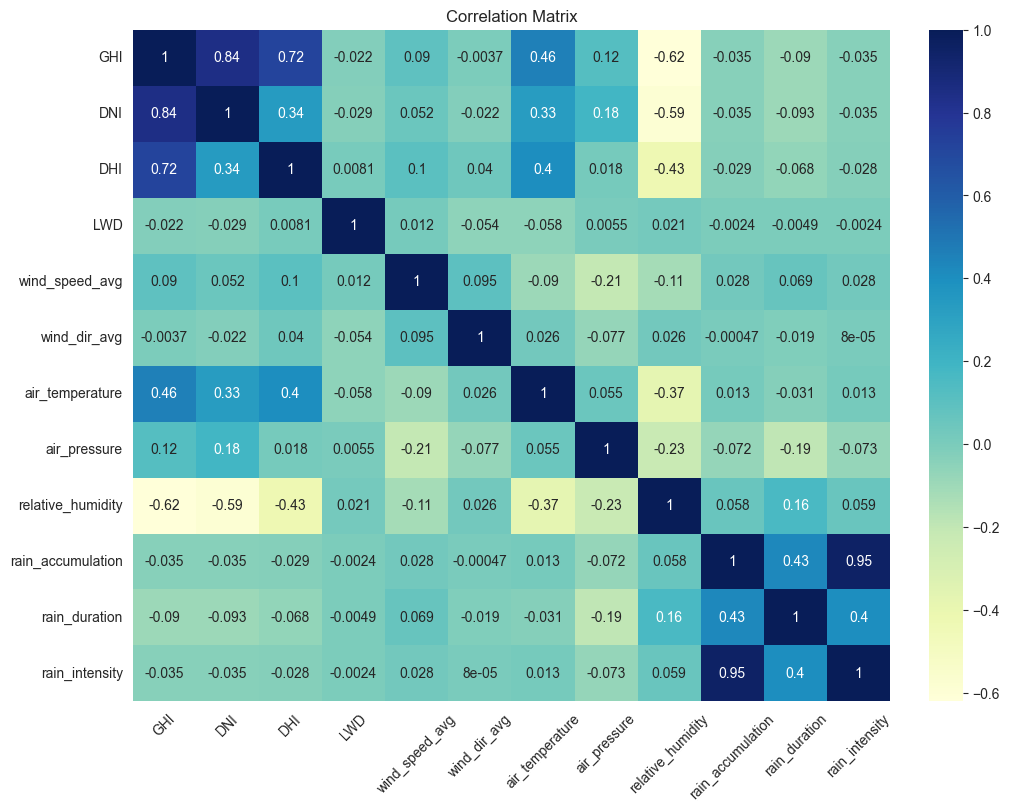

In [5]:
plt.figure(figsize=(10, 8), layout='constrained')
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.savefig('./thesis_content/correlation_matrix.png', dpi=100)
plt.show()

### Inspection of 2021-01 to 2021-03

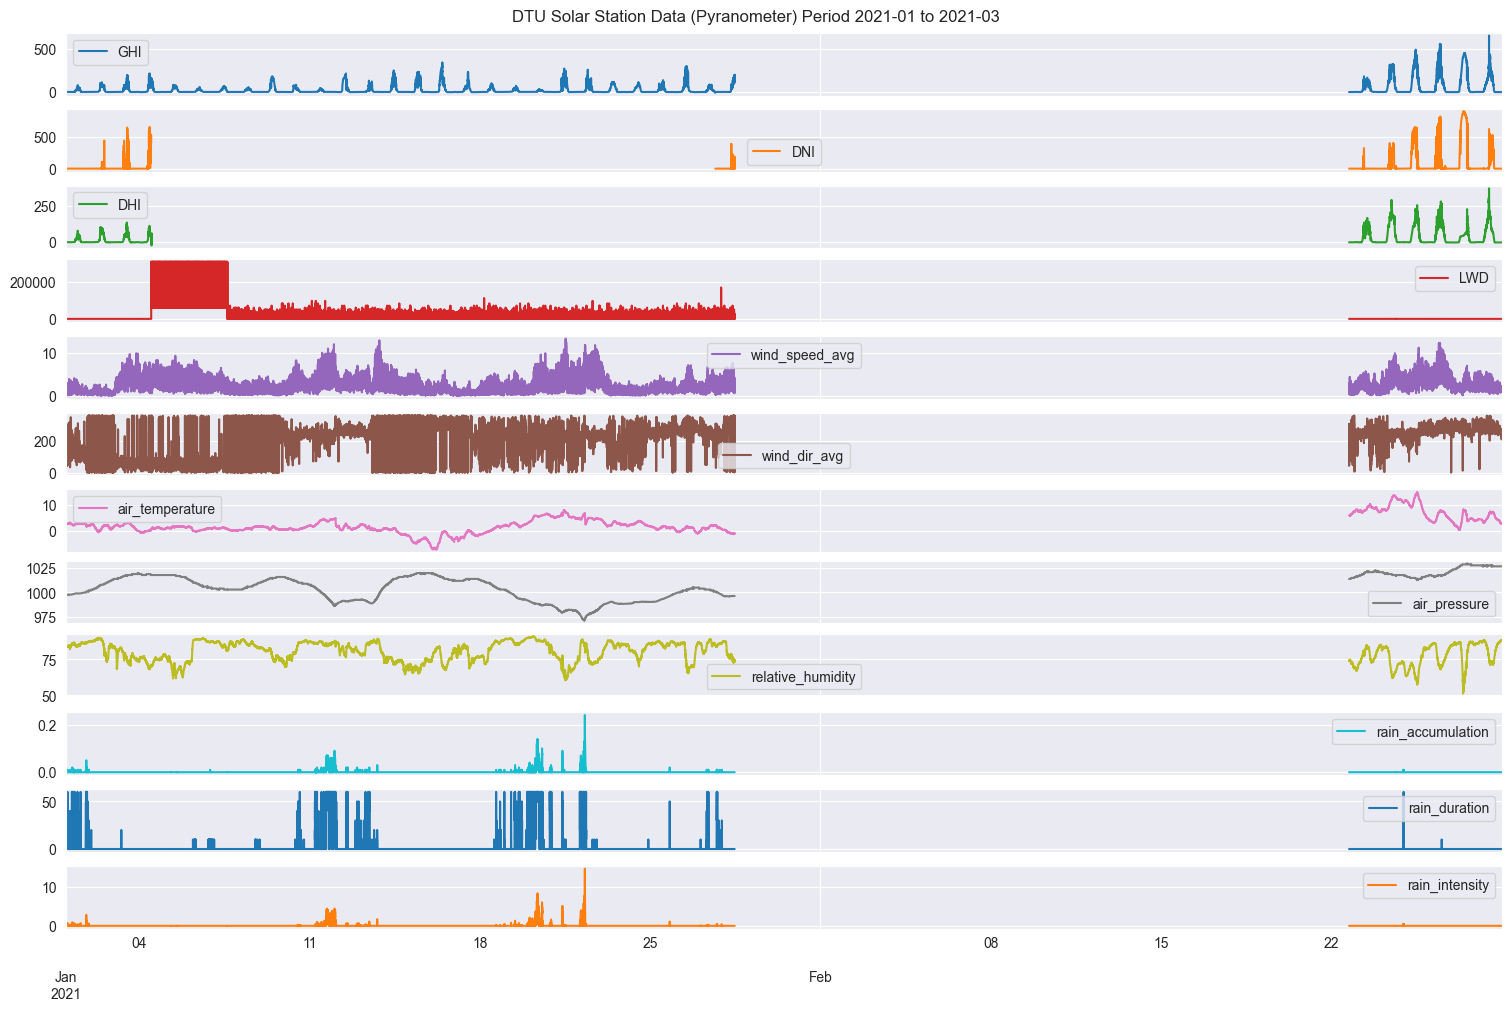

In [6]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 10), constrained_layout=True)
df.loc['2021-01':'2021-02'].plot(title='DTU Solar Station Data (Pyranometer) Period 2021-01 to 2021-03', subplots=True, ax=axes)
# Hide x-axis tick labels on all but the last subplot
for ax in axes[:-1]:
    ax.label_outer()  # hides x-axis tick labels and x-label
# Remove scientific notation on y-axis
for ax in axes:
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')  # Forces plain style
# plt.savefig('./thesis_content/time_series_data_bad_2021-01_2021-02.png', dpi=100)
plt.show()

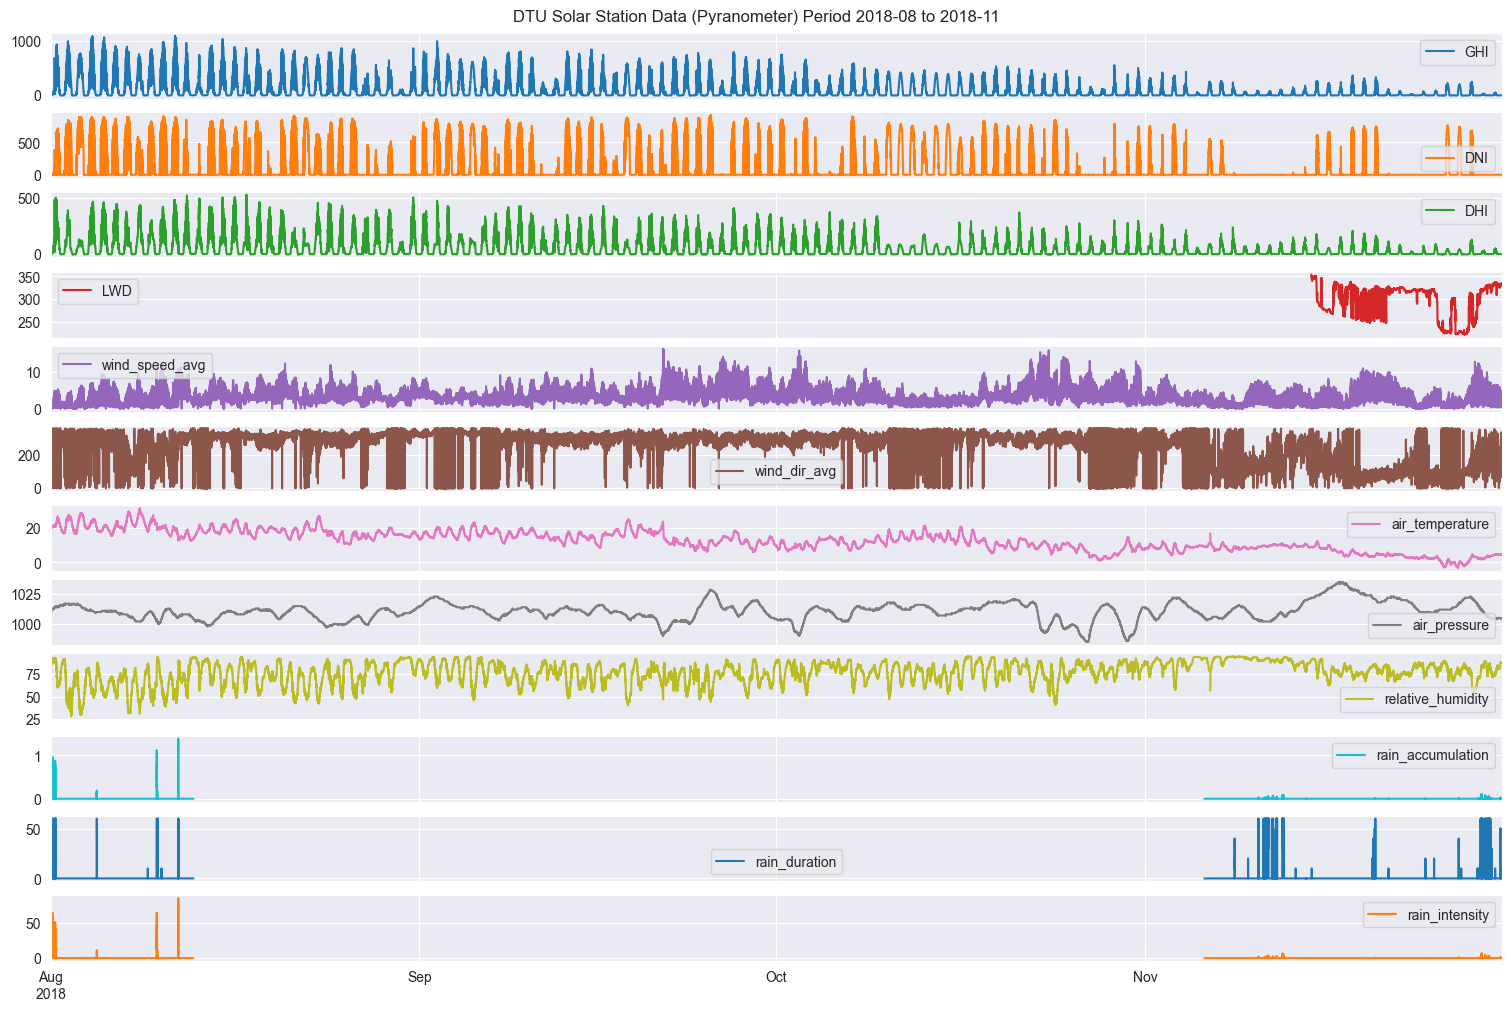

In [7]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 10), constrained_layout=True)
df.loc['2018-08':'2018-11'].plot(title='DTU Solar Station Data (Pyranometer) Period 2018-08 to 2018-11', subplots=True, ax=axes)
# Hide x-axis tick labels on all but the last subplot
for ax in axes[:-1]:
    ax.label_outer()  # hides x-axis tick labels and x-label
# Remove scientific notation on y-axis
for ax in axes:
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')  # Forces plain style
# plt.savefig('./thesis_content/time_series_data_bad_2018-08_2018-11.png', dpi=100)
plt.show()

# Load Preprocessed DTU Solar Station data

In [8]:
df:pd.DataFrame = pd.read_pickle(PKL_PROCESSED_STEP1_DTU_SOLAR_STATION)

print(df.shape)
print(df.info())
df.head()

(2460742, 10)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2460742 entries, 2015-03-12 05:36:00 to 2025-01-01 08:04:00
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DNI                float64
 1   DHI                float64
 2   wind_speed_avg     float64
 3   wind_dir_avg       float64
 4   air_temperature    float64
 5   air_pressure       float64
 6   relative_humidity  float64
 7   rain_duration      float64
 8   rain_intensity     float64
 9   solar_altitude     float64
dtypes: float64(10)
memory usage: 206.5 MB
None


,DNI,DHI,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_duration,rain_intensity,solar_altitude
2015-03-12 05:36:00,0.000000,2.890,1.0,85.0,0.0,1028.0,81.6,0.0,0.0,0.004880
2015-03-12 05:37:00,0.000000,3.128,0.3,121.0,0.0,1028.0,81.9,0.0,0.0,0.120481
2015-03-12 05:38:00,0.814740,3.307,0.7,342.0,0.0,1028.0,81.7,0.0,0.0,0.237359
2015-03-12 05:39:00,26.392772,3.657,0.7,342.0,0.0,1028.0,81.6,0.0,0.0,0.355447
2015-03-12 05:40:00,61.929423,4.056,1.2,302.0,0.0,1028.0,81.5,0.0,0.0,0.474681


In [14]:
from data_loader import MyDataLoader
from my_config import MyConfig, load_config

data_loader = MyDataLoader(None)
data_loader.load_data()
data_loader.reindex_full_range()
df = data_loader.df.copy()
df

,DHI,DNI,air_pressure,air_temperature,rain_duration,rain_intensity,relative_humidity,solar_altitude,wind_dir_avg,wind_speed_avg
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-01 08:00:00,0.0,0.0,990.0,8.3,50.0,0.3,85.5,1.553152,235.0,5.2
2025-01-01 08:01:00,0.0,0.0,989.8,8.3,60.0,0.4,85.6,1.641343,227.0,9.3
2025-01-01 08:02:00,0.0,0.0,990.0,8.3,40.0,0.5,85.5,1.729506,280.0,2.1
2025-01-01 08:03:00,0.0,0.0,989.9,8.3,50.0,0.5,85.6,1.817622,260.0,7.6


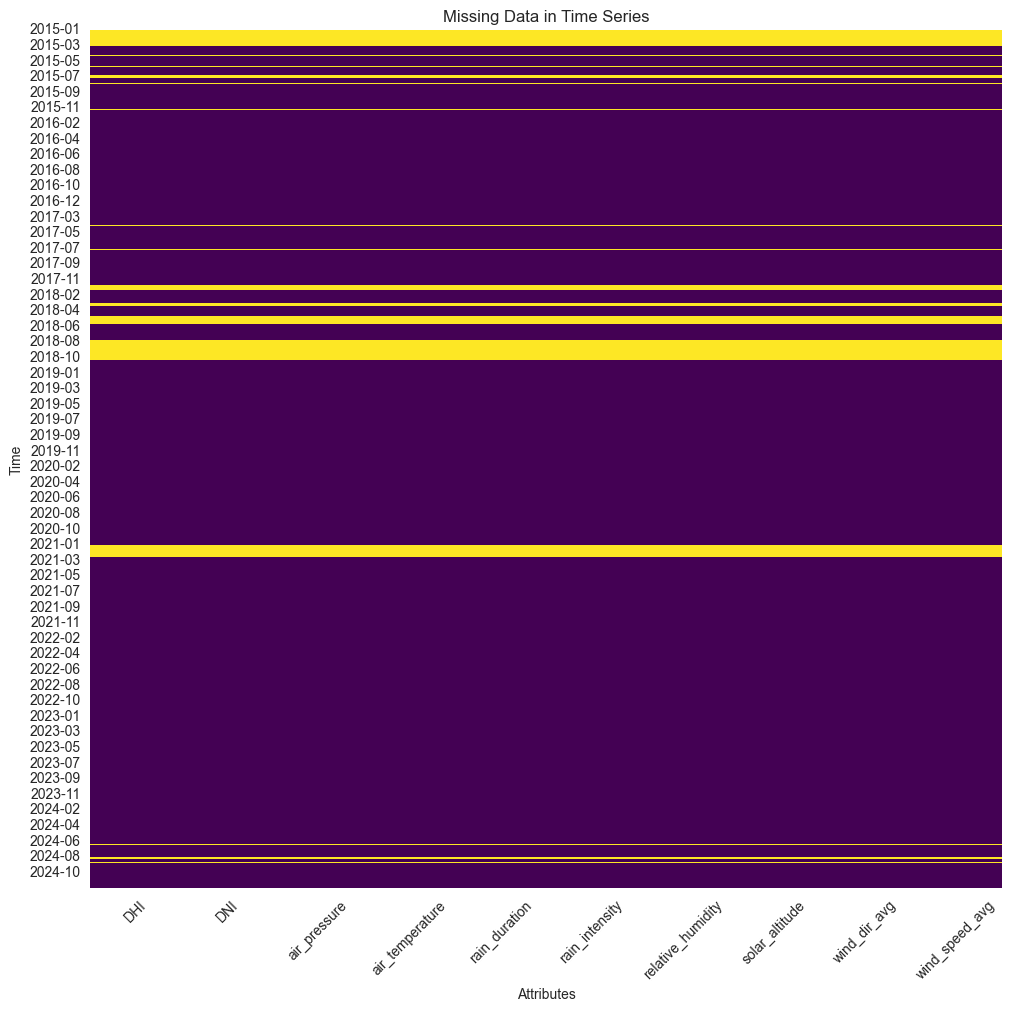

In [15]:
# Plot the heatmap
plt.figure(figsize=(10, 10), layout='constrained')
ax = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Time Series')
plt.xlabel('Attributes')
plt.ylabel('Time')
plt.xticks(rotation=45)
# Get current y-tick positions (these are row indices, not datetime values)
ytick_positions = ax.get_yticks()

# Format the tick labels to show only year and month.
# (Using int() to convert the float positions to integer indices; be sure they are in range.)
tick_labels = []
for pos in ytick_positions:
    idx = int(pos)
    if 0 <= idx < len(df.index):
        # Format datetime to 'YYYY-MM'
        tick_labels.append(df.index[idx].strftime('%Y-%m'))
    else:
        tick_labels.append('')

ax.set_yticklabels(tick_labels, rotation=0)
# plt.savefig('./thesis_content/preprocessed_missing_data.png', dpi=100)
plt.show()

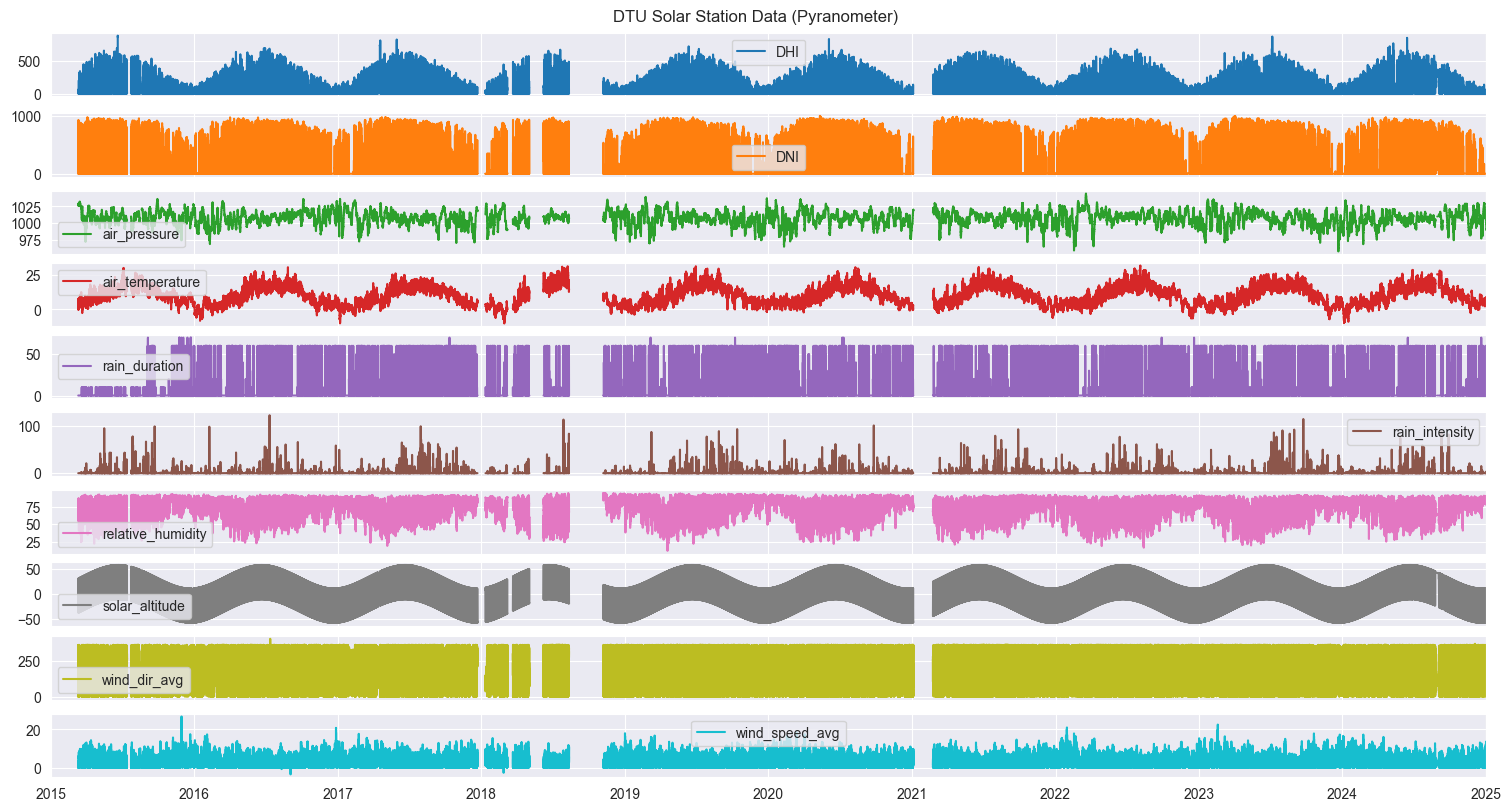

In [16]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 8), constrained_layout=True)
df.plot(title='DTU Solar Station Data (Pyranometer)', subplots=True, ax=axes)
# Hide x-axis tick labels on all but the last subplot
for ax in axes[:-1]:
    ax.label_outer()  # hides x-axis tick labels and x-label
# Remove scientific notation on y-axis
for ax in axes:
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')  # Forces plain style
# plt.savefig('./thesis_content/preprocessed_time_series_data.png', dpi=100)
plt.show()

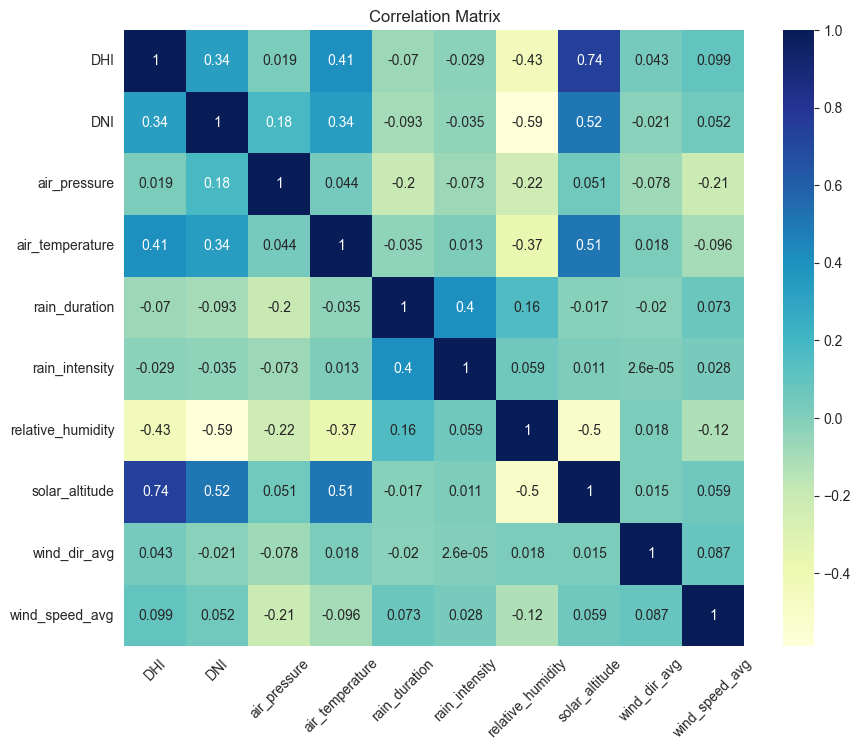

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
# plt.savefig('./thesis_content/preprocessed_correlation_matrix.png', dpi=100)
plt.show()

## Visualize different days
To get a feeling of how the data might look for each day, here i plot 81 different samples.

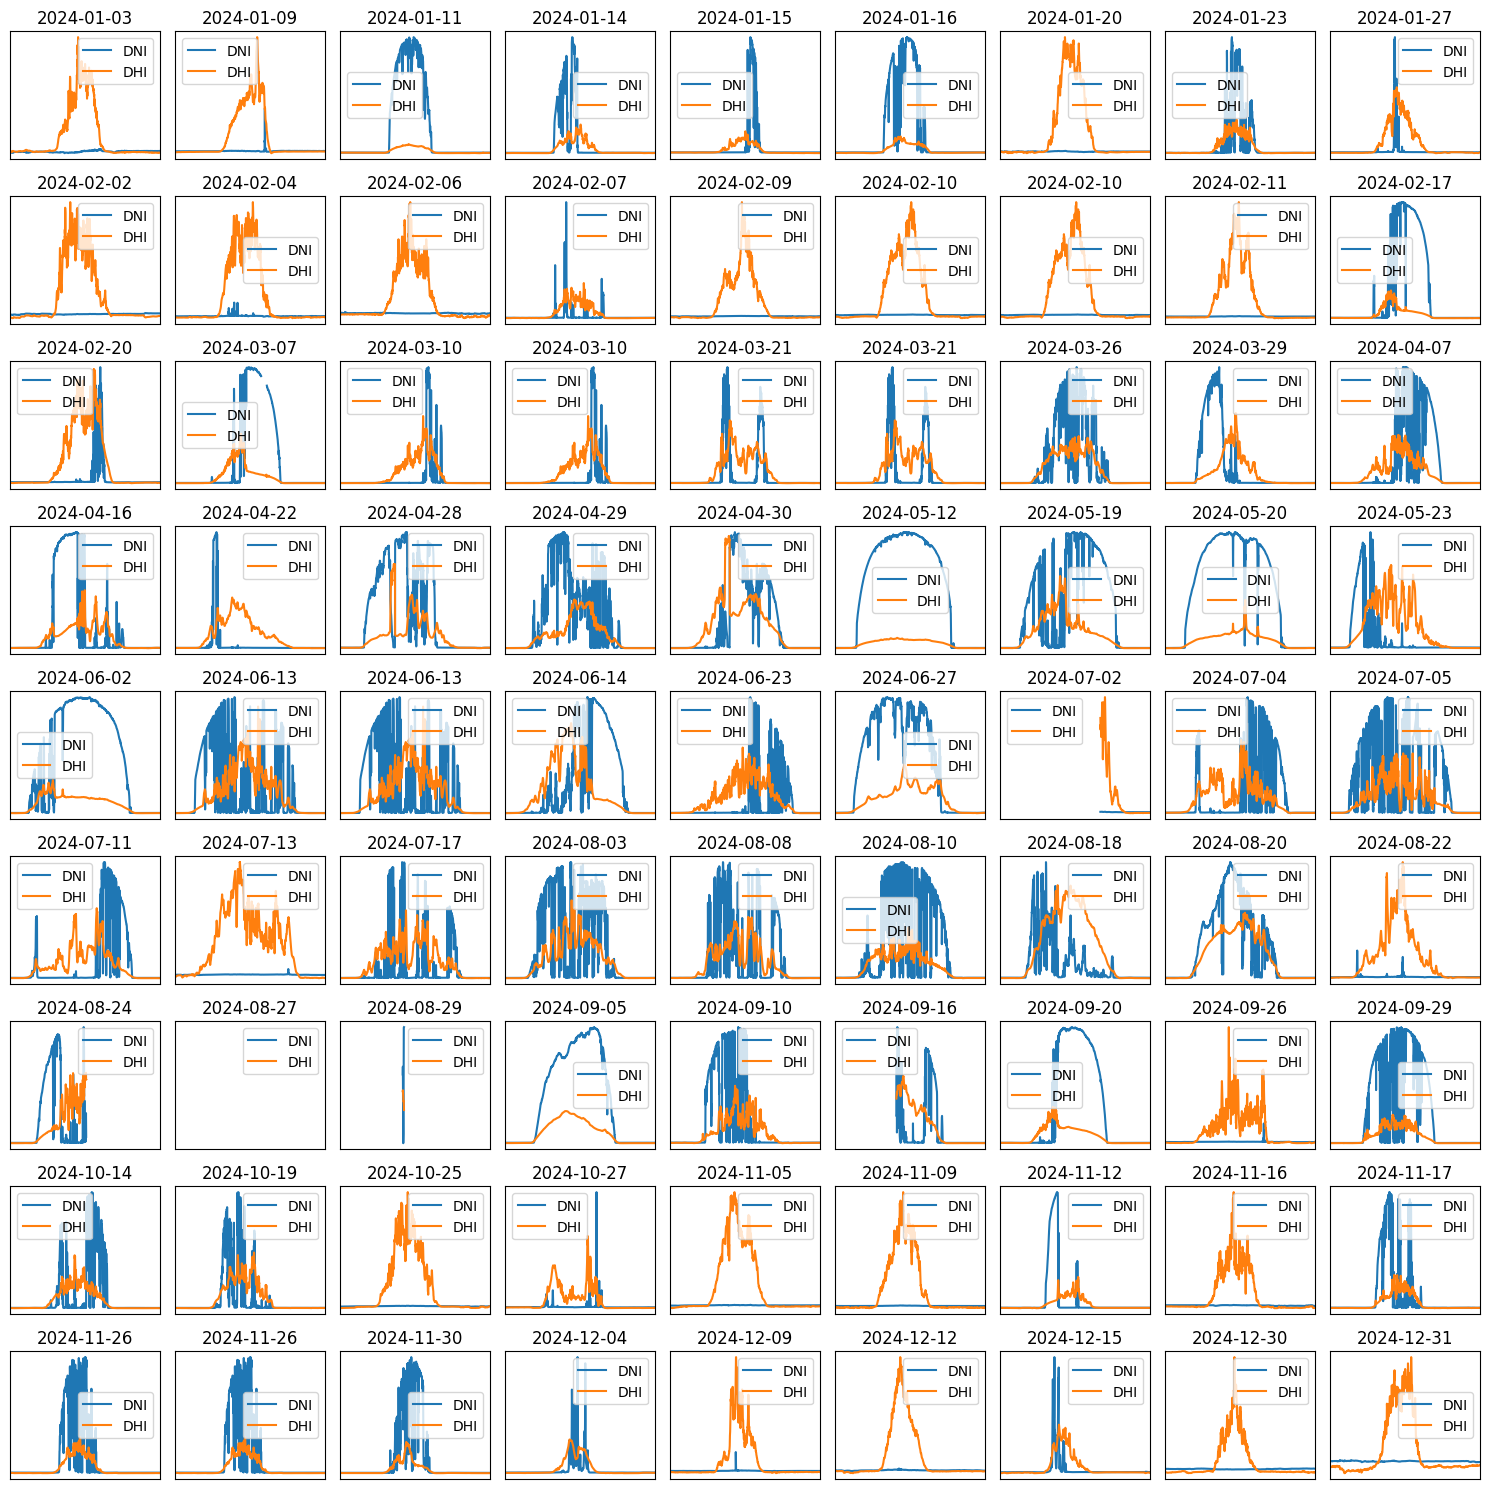

In [4]:
# Generate a large plot with subplots for random dates in the dataset
import random

df_tmp = df.loc['2024']
dates = random.sample(list(df_tmp.index), 81)
# sort the dates
dates = sorted(dates)
fig, axes = plt.subplots(9, 9, figsize=(15, 15))
for i, date in enumerate(dates):
    ax = axes[i // 9, i % 9]

    date_str = date.strftime('%Y-%m-%d')
    ax.set_title(f'{date_str}')
    df_tmp.loc[date_str, ['DNI', 'DHI']].plot(ax=ax)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,
                   left=False, right=False, labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

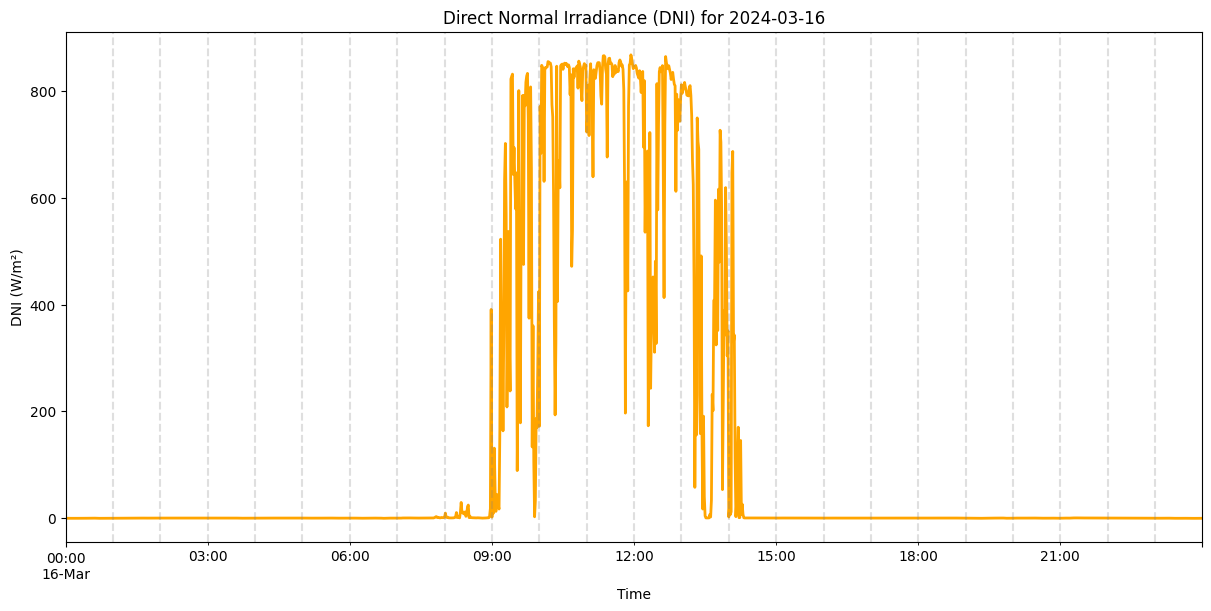

In [9]:
# Plot a single day of DNI observations
single_date = '2024-03-16'  # Choose a day with good solar irradiance data
plt.figure(figsize=(12, 6), layout='constrained')
df.loc[single_date, 'DNI'].plot(title=f'Direct Normal Irradiance (DNI) for {single_date}', 
                                 linewidth=2, color='orange')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')

# Add vertical lines at every hour with opacity 0.25
for hour in range(24):
    plt.axvline(x=pd.Timestamp(f'{single_date} {hour:02d}:00:00'), 
                color='gray', alpha=0.25, linestyle='--')

plt.show()

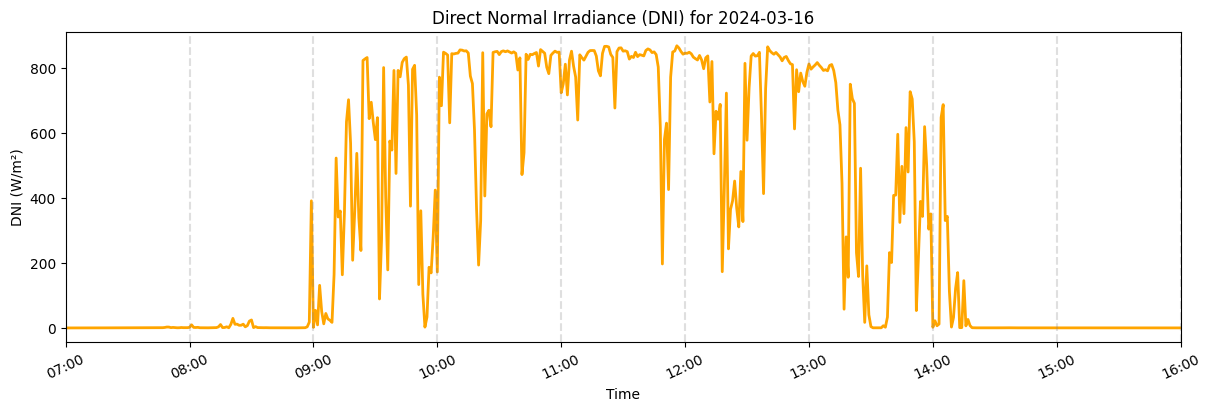

In [18]:
# Plot a single day of DNI observations
single_date = '2024-03-16'  # Choose a day with good solar irradiance data
plt.figure(figsize=(12, 4), layout='constrained')
df.loc[single_date, 'DNI'].plot(title=f'Direct Normal Irradiance (DNI) for {single_date}', 
                                 linewidth=2, color='orange')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')

# Add vertical lines at every hour with opacity 0.25
for hour in range(24):
    plt.axvline(x=pd.Timestamp(f'{single_date} {hour:02d}:00:00'), 
                color='gray', alpha=0.25, linestyle='--')

# Set x-tick labels at every hour and rotate by 25 degrees
hour_ticks = [pd.Timestamp(f'{single_date} {hour:02d}:00:00') for hour in range(24)]
plt.xticks(hour_ticks, [f'{hour:02d}:00' for hour in range(24)], rotation=25)
# limit x-axis to be between 07:00 and 17:00
plt.xlim(pd.Timestamp(f'{single_date} 07:00:00'), pd.Timestamp(f'{single_date} 16:00:00'))

plt.savefig(f'./thesis_content/dni_single_day_{single_date}.png', dpi=100)
plt.show()